**What I learned from looking from the ARRS data:**
- On average 5 problems were needed to master the content (if I understood the "avg_initial_#problems_to_master" column correctly) - gives us information on how often to assess students
- There are fewer and fewer students doing the reassassment every week (i.e. week 1 has a lot more reponses than week 10), but the average difference between the pretest and the posttest are generally increasing over time
- Nothing really interesting came out of the different checkpoints - I was hoping to see more retention over time, but there are so few datapoints in the further weeks that I didn't want to draw any conclusions there

**Ideas for how to choose checkpoint questions:**
- Started a [BKT notebook](https://colab.research.google.com/drive/1BlWa0fmN9hQ_e29SJv42H8z8aEAl_-We?usp=sharing) using this data - not really sure how to interpret it though
- Compare the BKT learn probabilities using the questions leading up to an assessment question for each student to their score. (i.e. did BKT predict that they would get it correct and did they actually get it correct?) 
- At which question did BKT predict that the student had mastered the skill?   Did the assessment come after? <-- this could indicate that a better question to assess their mastery might be the one the answered right before BKT predicted mastery

**Questions:**
- How did they choose the checkpoint questions?

In [1]:
# need to upload a file called ARRS_data.csv
from google.colab import files
uploaded = files.upload()

Saving assistments.csv to assistments.csv


In [0]:
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# setting up the dataframe
df = pd.read_csv("ARRS_data.csv")
df = df.rename(columns={"ARRS-check(oneMeansFirstWeek-TwomeansOneweekLater-threemeanstwoweeksafterthat)": "ARRS-check"})
df

,problemlog_id,assignment_id,sequence_id,user_id,ARRS,assistment_id,problem_id,sequence_opp,assignment_opp,ARRS-check,correct,hint_count,attempt_count,first_response_time,overlap_time,cluster,pretest,posttest,avg_initial_three_correctness,avg_initial_#problems_to_master,avg_first_reassess
0,40790855,297282,5959,75063,0,34310,53621,1,1,1,0,0,1,13260,13353,0,0,1,0.671795,6.323529,0.684211
1,40790864,297282,5959,75063,0,34289,53537,2,2,1,1,0,1,4820,4820,0,0,1,0.671795,6.323529,0.684211
2,40790866,297282,5959,75063,0,34295,53561,3,3,1,1,0,1,8340,8340,0,0,1,0.671795,6.323529,0.684211
3,40790867,297282,5959,75063,0,34338,53733,4,4,1,1,0,1,10758,10758,0,0,1,0.671795,6.323529,0.684211
4,40897310,299510,5959,75063,0,34329,53697,5,1,2,1,0,0,10,10,1,0,1,0.671795,6.323529,0.684211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,41038106,301286,15675,93241,1,121297,231946,1,1,1,1,0,1,44759,44759,0,1,0,0.630769,5.470588,0.666667
25401,41038288,301286,15675,93241,1,121263,231911,2,2,1,0,0,5,55244,70970,0,1,0,0.630769,5.470588,0.666667
25402,41038533,301286,15675,93241,1,121220,231868,3,3,1,1,0,1,20336,20336,0,1,0,0.630769,5.470588,0.666667
25403,41038618,301286,15675,93241,1,121261,231909,4,4,1,1,0,1,12483,12483,0,1,0,0.630769,5.470588,0.666667


In [0]:
# on average 5 problems were needed to master the content - gives us information on how often to assess students
students = df.groupby(["user_id"]).max()
students.sort_values("avg_initial_#problems_to_master")["avg_initial_#problems_to_master"].mean()


5.384729649424242

In [0]:
# average difference between pretest and posttest for each ARRS-check point
grouped = df.groupby(["ARRS-check"]).mean()
grouped["diff"] = grouped["posttest"] - grouped["pretest"]
grouped[["diff"]]


,posttest
ARRS-check,
1,0.610701
2,0.677567
3,0.712220
4,0.784953
5,0.704715
6,0.918519
7,0.952941
8,0.913043
9,1.000000


Number of rows per ARRS-check value:
1 16391
2 3945
3 2905
4 1502
5 403
6 135
7 85
8 23
9 12
10 4


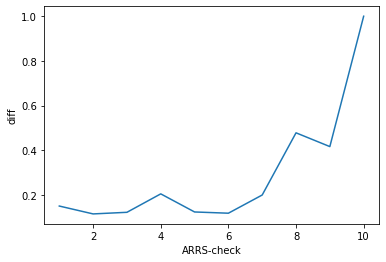

In [0]:
''' 
over time the difference between posttest and pretest increases 
-  fewever students are taking the ARRS-checks as late as 10 weeks, but those that are have a high retention of the material 
-  need to figure abuot 
'''
print("Number of rows per ARRS-check value:")
for i in range(1,11):
  print(i, len(df[df["ARRS-check"] == i]))

sns.lineplot(x=grouped.index, y="diff", data=grouped)